# DengAI Prediction

An attempt is being made to create a model that can predict the number of Dengue fever cases based on a specific week of the year. The data has already been divided into training and testing sets and labeled accordingly.

In [39]:
# import the basic necessery libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [41]:
# read all the data set
dengue_label_data = pd.read_csv('dengue_labels_train.csv')
dengue_feature_train_data = pd.read_csv('dengue_features_train.csv')
dengue_feature_test_data = pd.read_csv('dengue_features_test.csv')

from IPython.display import display, HTML

# Define CSS styles for scrollable tables
css_style = """
<style>
table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
 
}

td, th {
    border: 1px solid #dddddd;
    text-align: center;
    padding: 4px;
}

</style>
"""

# Display the DataFrame
display(HTML(css_style))
print("Dengue Label Data:")
display(dengue_label_data.head())

print("\nDengue Feature Train Data:")
display(dengue_feature_train_data.head())

print("\nDengue Feature Test Data:")
display(dengue_feature_test_data.head())


Dengue Label Data:


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6



Dengue Feature Train Data:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8



Dengue Feature Test Data:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


### Abbreiviations

city – City abbreviations: sj for San Juan and iq for Iquitos\
week_start_date – Date given in yyyy-mm-dd format

ndvi_se – Pixel southeast of city centroid\
ndvi_sw – Pixel southwest of city centroid\
ndvi_ne – Pixel northeast of city centroid\
ndvi_nw – Pixel northwest of city centroid

precipitation_amt_mm – Total precipitation

reanalysis_sat_precip_amt_mm – Total precipitation\
reanalysis_dew_point_temp_k – Mean dew point temperature\
reanalysis_air_temp_k – Mean air temperature\
reanalysis_relative_humidity_percent – Mean relative humidity\
reanalysis_specific_humidity_g_per_kg – Mean specific humidity\
reanalysis_precip_amt_kg_per_m2 – Total precipitation\
reanalysis_max_air_temp_k – Maximum air temperature\
reanalysis_min_air_temp_k – Minimum air temperature\
reanalysis_avg_temp_k – Average air temperature\
reanalysis_tdtr_k – Diurnal temperature range

station_max_temp_c – Maximum temperature\
station_min_temp_c – Minimum temperature\
station_avg_temp_c – Average temperature\
station_precip_mm – Total precipitation\
station_diur_temp_rng_c – Diurnal temperature range

In [42]:
dengue_feature_train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

Text(0.5, 1.0, 'Temperature-related Features in Kelvin')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='station_avg_temp_c'>

<Axes: xlabel='year', ylabel='station_avg_temp_c'>

<Axes: xlabel='year', ylabel='station_avg_temp_c'>

Text(0.5, 1.0, 'Temperature-related Features in Celsius')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='reanalysis_relative_humidity_percent'>

<Axes: xlabel='year', ylabel='reanalysis_relative_humidity_percent'>

Text(0.5, 1.0, 'Humidity-related Features')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

Text(0.5, 1.0, 'Precipitation-related Features')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='ndvi_ne'>

<Axes: xlabel='year', ylabel='ndvi_ne'>

<Axes: xlabel='year', ylabel='ndvi_ne'>

<Axes: xlabel='year', ylabel='ndvi_ne'>

Text(0.5, 1.0, 'Vegetation-related Features')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

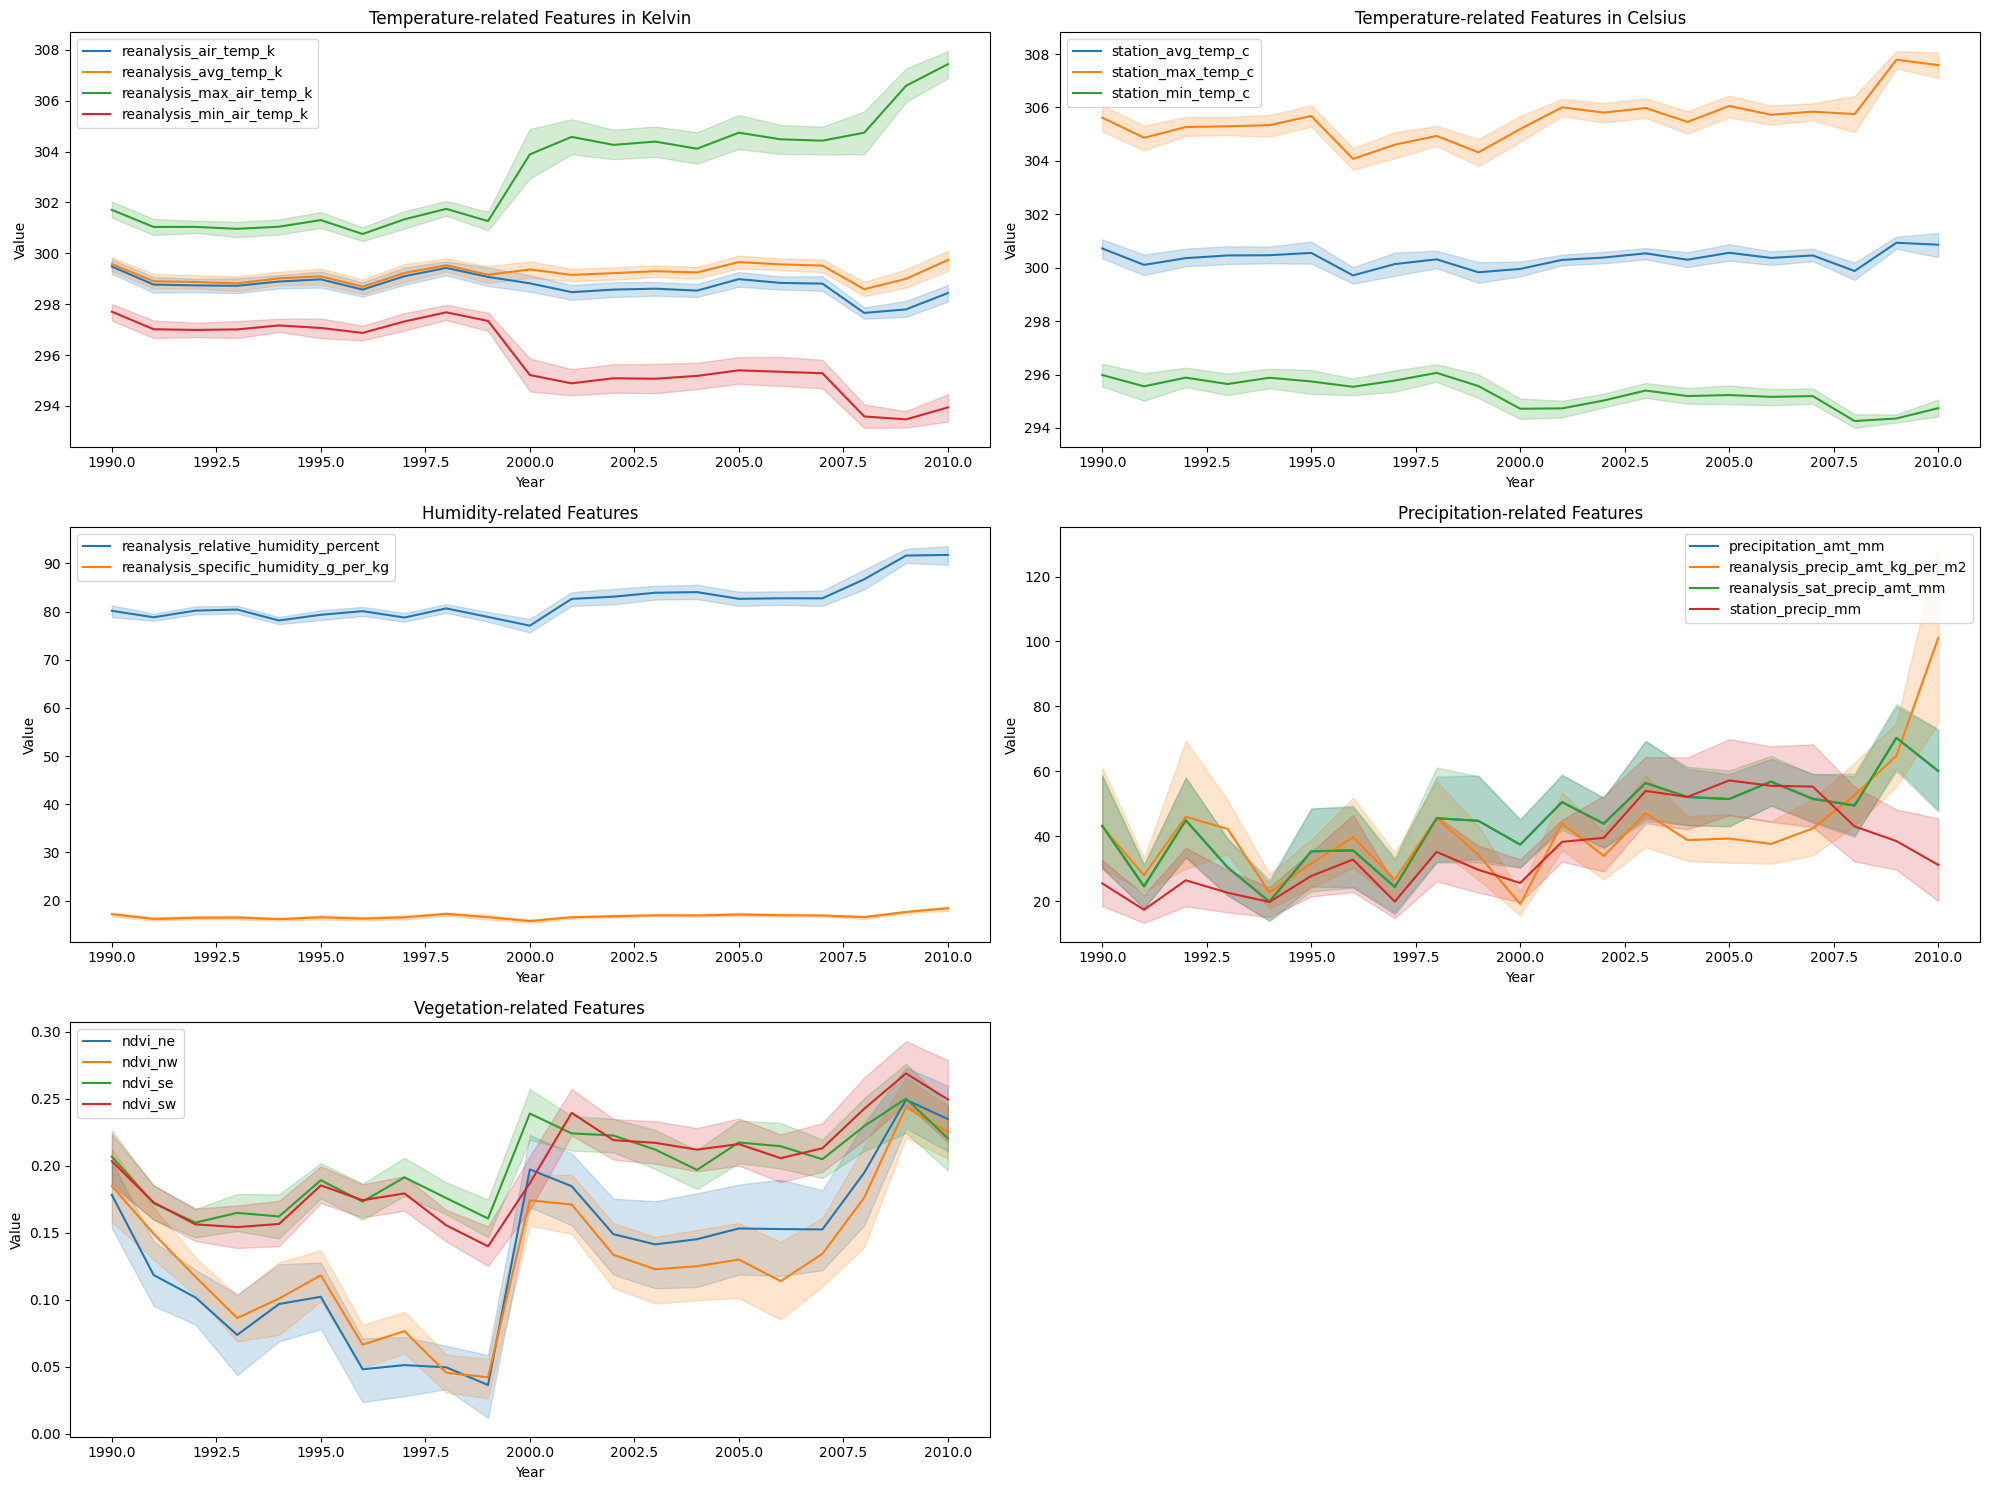

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
# convert temp to Kelvin for all features
dengue_feature_train_data[['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']] += 273.15
dengue_feature_test_data[['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']] += 273.15
# Define groups of similar features
reanalysis_temp = ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']
station_temp = ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']
humidity_features = ['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']
precipitation_features = ['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm']
vegetation_features = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']

# Create subplots for each feature group
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Plot temperature-related features in Kelvin
for column in reanalysis_temp:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[0, 0])
axs[0, 0].set_title('Temperature-related Features in Kelvin')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Value')
axs[0, 0].legend()

# Plot temperature-related features in Celsius
for column in station_temp:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[0, 1])
axs[0, 1].set_title('Temperature-related Features in Celsius')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Value')
axs[0, 1].legend()

# Plot humidity-related features
for column in humidity_features:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[1, 0])
axs[1, 0].set_title('Humidity-related Features')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Value')
axs[1, 0].legend()

# Plot precipitation-related features
for column in precipitation_features:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[1, 1])
axs[1, 1].set_title('Precipitation-related Features')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Value')
axs[1, 1].legend()

# Plot vegetation-related features
for column in vegetation_features:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[2, 0])
axs[2, 0].set_title('Vegetation-related Features')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Value')
axs[2, 0].legend()

# Remove the empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()



array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

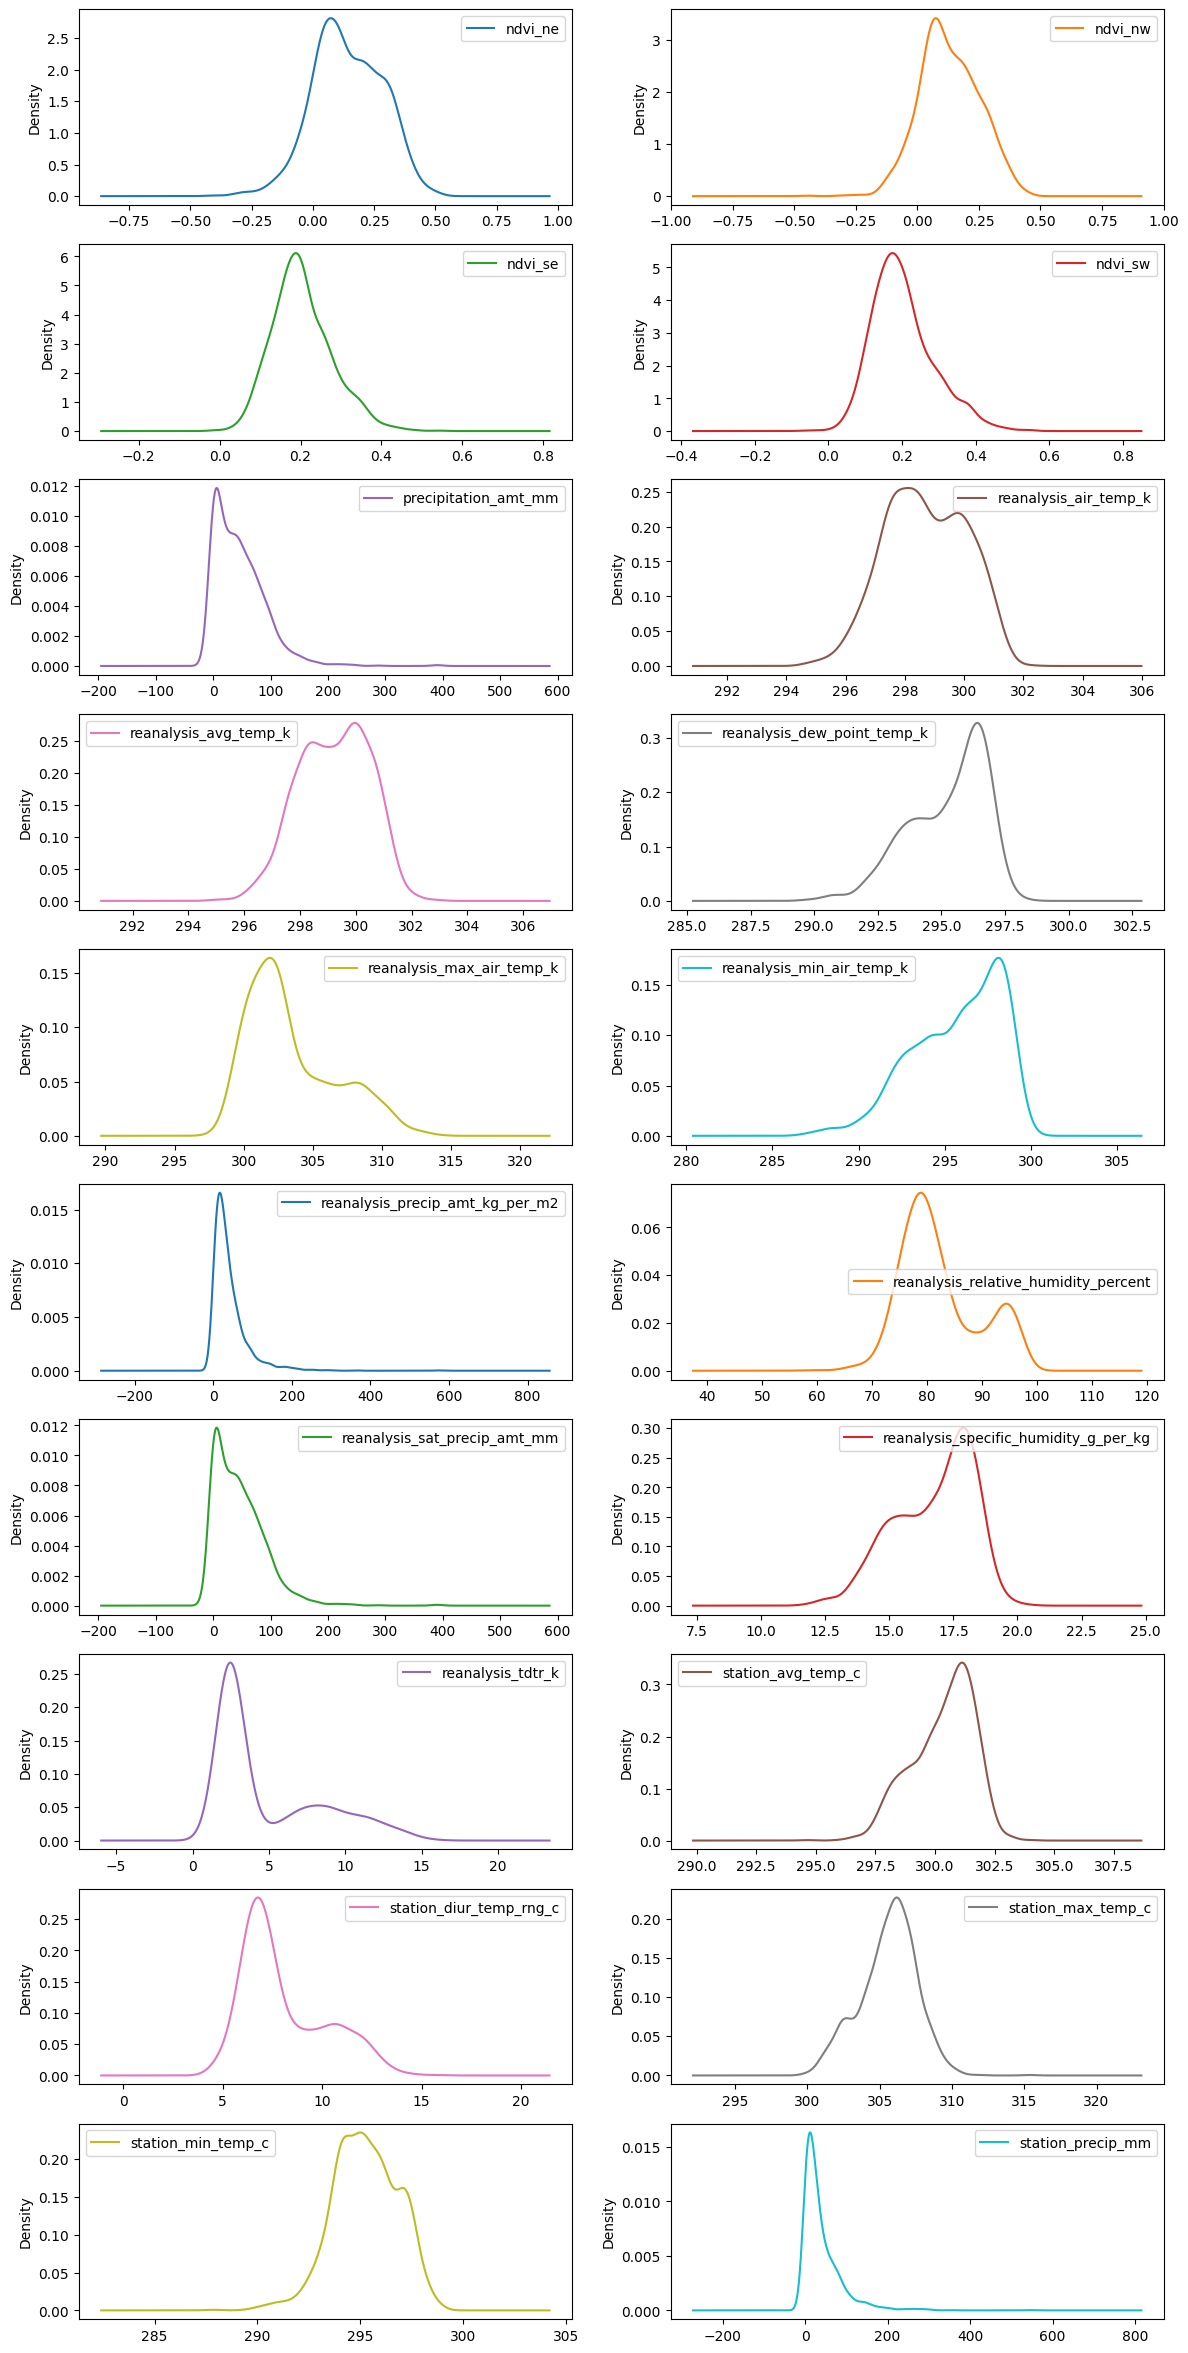

In [44]:
(dengue_feature_train_data.drop(['year', 'weekofyear'], axis=1)
    .plot(kind='kde', subplots=True, figsize=(14, 30), layout=(10, 2), sharex=False))

In [45]:
# Display the DataFrame descriptions

print("Dengue Label Data Description:")
display(dengue_label_data.describe())

print("\nDengue Feature Train Data Description:")
display(dengue_feature_train_data.describe())

print("\nDengue Feature Test Data Description:")
display(dengue_feature_test_data.describe())

Dengue Label Data Description:


,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000



Dengue Feature Train Data Description:


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,300.335783,8.059328,305.602437,295.252150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,294.550000,4.528571,299.850000,287.850000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,299.450000,6.514286,304.250000,294.250000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,300.564286,7.300000,305.950000,295.350000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,301.307143,9.566667,307.050000,296.450000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,303.950000,15.800000,315.350000,298.750000,543.300000



Dengue Feature Test Data Description:


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,...,42.171135,82.499810,38.354324,16.927088,5.124569,300.519587,7.810991,305.684625,295.518550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,...,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,...,0.000000,64.920000,0.000000,12.537143,1.485714,297.307143,4.042857,300.350000,287.350000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,...,9.430000,77.397143,8.175000,15.792857,2.446429,299.664286,5.928571,304.250000,294.350000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,...,25.850000,80.330000,31.455000,17.337143,2.914286,300.633333,6.642857,305.950000,295.350000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,...,56.475000,88.328929,57.772500,18.174643,8.171429,301.469048,9.812500,307.050000,296.450000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,...,301.400000,97.982857,169.340000,19.598571,14.485714,303.421429,14.725000,311.550000,299.850000,212.000000


There are some missing values can be observe from the describtion of dataset\
Find the missing data and fill them with there nearest values

In [46]:
# display the null values count

print("Dengue Label Data null count:\n", 
      dengue_label_data.isnull().sum())

print("\nDengue Feature Train Data null count:\n",
      dengue_feature_train_data.isnull().sum())

print("\nDengue Feature Test Data null count:\n",
      dengue_feature_test_data.isnull().sum())

Dengue Label Data null count:
 city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

Dengue Feature Train Data null count:
 city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                     

In [47]:
# advanced techniques like interpolation
dengue_feature_train_data.interpolate(method='linear', inplace=True)
dengue_feature_test_data.interpolate(method='linear', inplace=True)
dengue_label_data.interpolate(method='linear', inplace=True)

C:\Users\nilak\AppData\Local\Temp\ipykernel_13504\668277097.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dengue_feature_train_data.interpolate(method='linear', inplace=True)
C:\Users\nilak\AppData\Local\Temp\ipykernel_13504\668277097.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dengue_feature_test_data.interpolate(method='linear', inplace=True)
C:\Users\nilak\AppData\Local\Temp\ipykernel_13504\668277097.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dengue_label_data.interpolate(method='linear', inplace=True)


In [48]:
# Convert 'week_start_date' to datetime object
dengue_feature_train_data['week_start_date'] = pd.to_datetime(dengue_feature_train_data['week_start_date'])
dengue_feature_test_data['week_start_date'] = pd.to_datetime(dengue_feature_test_data['week_start_date'])
# Extract additional features like month or day of the week
dengue_feature_train_data['month'] = dengue_feature_train_data['week_start_date'].dt.month
dengue_feature_train_data['day_of_week'] = dengue_feature_train_data['week_start_date'].dt.dayofweek
dengue_feature_test_data['month'] = dengue_feature_test_data['week_start_date'].dt.month
dengue_feature_test_data['day_of_week'] = dengue_feature_test_data['week_start_date'].dt.dayofweek

# Calculate last week temp feature for dengue cases
dengue_feature_train_data['previous_week_temp'] = dengue_feature_train_data['reanalysis_avg_temp_k'].shift(1)
dengue_feature_test_data['previous_week_temp'] = dengue_feature_test_data['reanalysis_avg_temp_k'].shift(1)

# Calculte the mean temp
dengue_feature_train_data['station_mean_temp'] = dengue_feature_train_data[['station_avg_temp_c', 'station_min_temp_c','station_max_temp_c']].mean(axis=1)
dengue_feature_test_data['station_mean_temp'] = dengue_feature_test_data[['station_avg_temp_c', 'station_min_temp_c','station_max_temp_c']].mean(axis=1)

# Calculate reanalysis mean temp
dengue_feature_train_data["reanalysis_mean_temp"] = dengue_feature_train_data[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']].mean(axis=1)
dengue_feature_test_data["reanalysis_mean_temp"] = dengue_feature_test_data[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']].mean(axis=1)

# Calculate ndvi mean
dengue_feature_train_data['ndvi'] = dengue_feature_train_data[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']].mean(axis=1)
dengue_feature_test_data['ndvi'] = dengue_feature_test_data[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']].mean(axis=1)

# Calculate rolling mean of precipitation
dengue_feature_train_data['rolling_precip_mean'] = dengue_feature_train_data['precipitation_amt_mm'].rolling(window=5).mean()
dengue_feature_test_data['rolling_precip_mean'] = dengue_feature_test_data['precipitation_amt_mm'].rolling(window=5).mean()
dengue_feature_train_data['rolling_precip_mean_station'] = dengue_feature_train_data['station_precip_mm'].rolling(window=5).mean()
dengue_feature_test_data['rolling_precip_mean_station'] = dengue_feature_test_data['station_precip_mm'].rolling(window=5).mean()
dengue_feature_train_data['rolling_precip_mean_reanalysis'] = dengue_feature_train_data['reanalysis_sat_precip_amt_mm'].rolling(window=5).mean()
dengue_feature_test_data['rolling_precip_mean_reanalysis'] = dengue_feature_test_data['reanalysis_sat_precip_amt_mm'].rolling(window=5).mean()

# Create interaction feature
dengue_feature_train_data['temp_humidity_interaction'] = dengue_feature_train_data['reanalysis_air_temp_k'] * dengue_feature_train_data['reanalysis_relative_humidity_percent']
dengue_feature_test_data['temp_humidity_interaction'] = dengue_feature_test_data['reanalysis_air_temp_k'] * dengue_feature_test_data['reanalysis_relative_humidity_percent']

In [49]:
dengue_feature_train_data = dengue_feature_train_data.drop(columns=['station_avg_temp_c', 'station_min_temp_c','station_max_temp_c','reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 
     'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw'])
dengue_feature_test_data = dengue_feature_test_data.drop(columns=['station_avg_temp_c', 'station_min_temp_c','station_max_temp_c','reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 
     'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw'])

In [50]:
# advanced techniques like interpolation
dengue_feature_train_data = dengue_feature_train_data.dropna()
dengue_feature_test_data = dengue_feature_test_data.dropna()

In [51]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding
dengue_feature_train_data['city_encoded'] = label_encoder.fit_transform(dengue_feature_train_data['city'])
dengue_feature_test_data['city_encoded'] = label_encoder.fit_transform(dengue_feature_test_data['city'])
dengue_feature_train_data.head()

,city,year,weekofyear,week_start_date,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,...,day_of_week,previous_week_temp,station_mean_temp,reanalysis_mean_temp,ndvi,rolling_precip_mean,rolling_precip_mean_station,rolling_precip_mean_reanalysis,temp_humidity_interaction,city_encoded
4,sj,1990,22,1990-05-28,7.52,299.664286,12.20,80.460000,7.52,17.210000,...,0,299.228571,302.430952,298.685000,0.239235,18.532,15.16,18.532,24099.264257,1
5,sj,1990,23,1990-06-04,9.58,299.764286,26.49,79.891429,9.58,17.212857,...,0,299.664286,301.954762,298.995357,0.191364,17.964,19.78,17.964,23937.868743,1
6,sj,1990,24,1990-06-11,3.48,299.221429,38.60,82.000000,3.48,17.234286,...,0,299.764286,300.788095,298.518214,0.155261,14.096,24.00,14.096,24534.985714,1
7,sj,1990,25,1990-06-18,151.12,299.528571,30.00,83.375714,151.12,17.977143,...,0,299.221429,301.507143,298.780714,0.107375,37.412,19.94,37.412,24978.649351,1
8,sj,1990,26,1990-06-25,19.32,299.557143,37.51,82.768571,19.32,17.790000,...,0,299.528571,301.492857,298.939286,0.124449,38.204,23.36,38.204,24795.690388,1


In [52]:
dengue_feature_train_data = pd.merge(dengue_feature_train_data, dengue_label_data, on=['city', 'year', 'weekofyear'], how='inner')
dengue_feature_train_data.describe()

,year,weekofyear,week_start_date,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,...,previous_week_temp,station_mean_temp,reanalysis_mean_temp,ndvi,rolling_precip_mean,rolling_precip_mean_station,rolling_precip_mean_reanalysis,temp_humidity_interaction,city_encoded,total_cases
count,1452.000000,1452.000000,1452,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,2001.061983,26.522727,2001-07-20 21:39:10.413223168,45.769356,299.223509,40.174191,82.183730,45.769356,16.747463,4.907418,...,299.223091,300.393292,298.272371,0.166111,45.712452,39.421474,45.712452,24544.239538,0.641873,24.732094
min,1990.000000,1.000000,1990-05-28 00:00:00,0.000000,294.892857,0.000000,57.787143,0.000000,11.715714,1.357143,...,294.892857,296.130952,294.402857,-0.092565,0.000000,0.440000,0.000000,17382.537678,0.000000,0.000000
25%,1997.000000,13.000000,1997-05-19 06:00:00,9.760000,298.257143,13.175000,77.196429,9.760000,15.560000,2.328571,...,298.257143,299.558333,297.393750,0.099697,26.315000,19.830000,26.315000,23107.608360,0.000000,5.000000
50%,2002.000000,27.000000,2002-06-04 00:00:00,38.475000,299.289286,27.315000,80.287857,38.475000,17.092143,2.857143,...,299.285714,300.650000,298.446786,0.146895,44.485000,31.210000,44.485000,24031.413563,1.000000,12.000000
75%,2005.000000,40.000000,2005-11-27 18:00:00,70.260000,300.207143,52.275000,86.528214,70.260000,17.977500,7.646429,...,300.207143,301.374524,299.265893,0.225489,63.240500,49.515000,63.240500,25766.236898,1.000000,28.000000
max,2010.000000,53.000000,2010-06-25 00:00:00,390.600000,302.928571,570.500000,98.610000,390.600000,20.461429,16.028571,...,302.928571,304.750000,301.048929,0.503982,137.378000,159.900000,137.378000,29255.896543,1.000000,461.000000
std,5.384616,15.035502,NaN,43.690325,1.261324,43.361286,7.157026,43.690325,1.540986,3.545261,...,1.261221,1.297780,1.223525,0.091211,26.773909,28.942076,26.773909,2089.669854,0.479615,43.642498


In [53]:
dengue_feature_train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'precipitation_amt_mm',
       'reanalysis_avg_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_precip_mm', 'month', 'day_of_week',
       'previous_week_temp', 'station_mean_temp', 'reanalysis_mean_temp',
       'ndvi', 'rolling_precip_mean', 'rolling_precip_mean_station',
       'rolling_precip_mean_reanalysis', 'temp_humidity_interaction',
       'city_encoded', 'total_cases'],
      dtype='object')

<Axes: xlabel='total_cases', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Dengue Cases')

Text(0.5, 0, 'Total Cases')

Text(0, 0.5, 'Frequency')

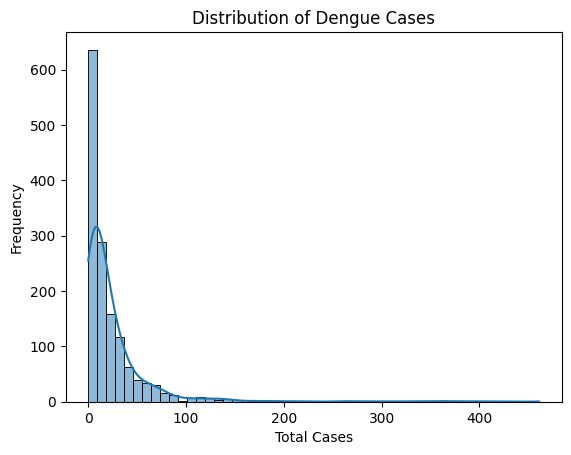

<Axes: xlabel='week_start_date', ylabel='total_cases'>

Text(0.5, 1.0, 'Time Series of Dengue Cases')

Text(0.5, 0, 'Week Start Date')

Text(0, 0.5, 'Total Cases')

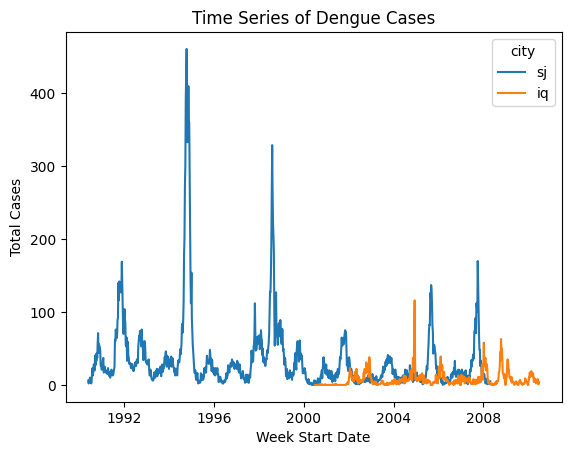

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

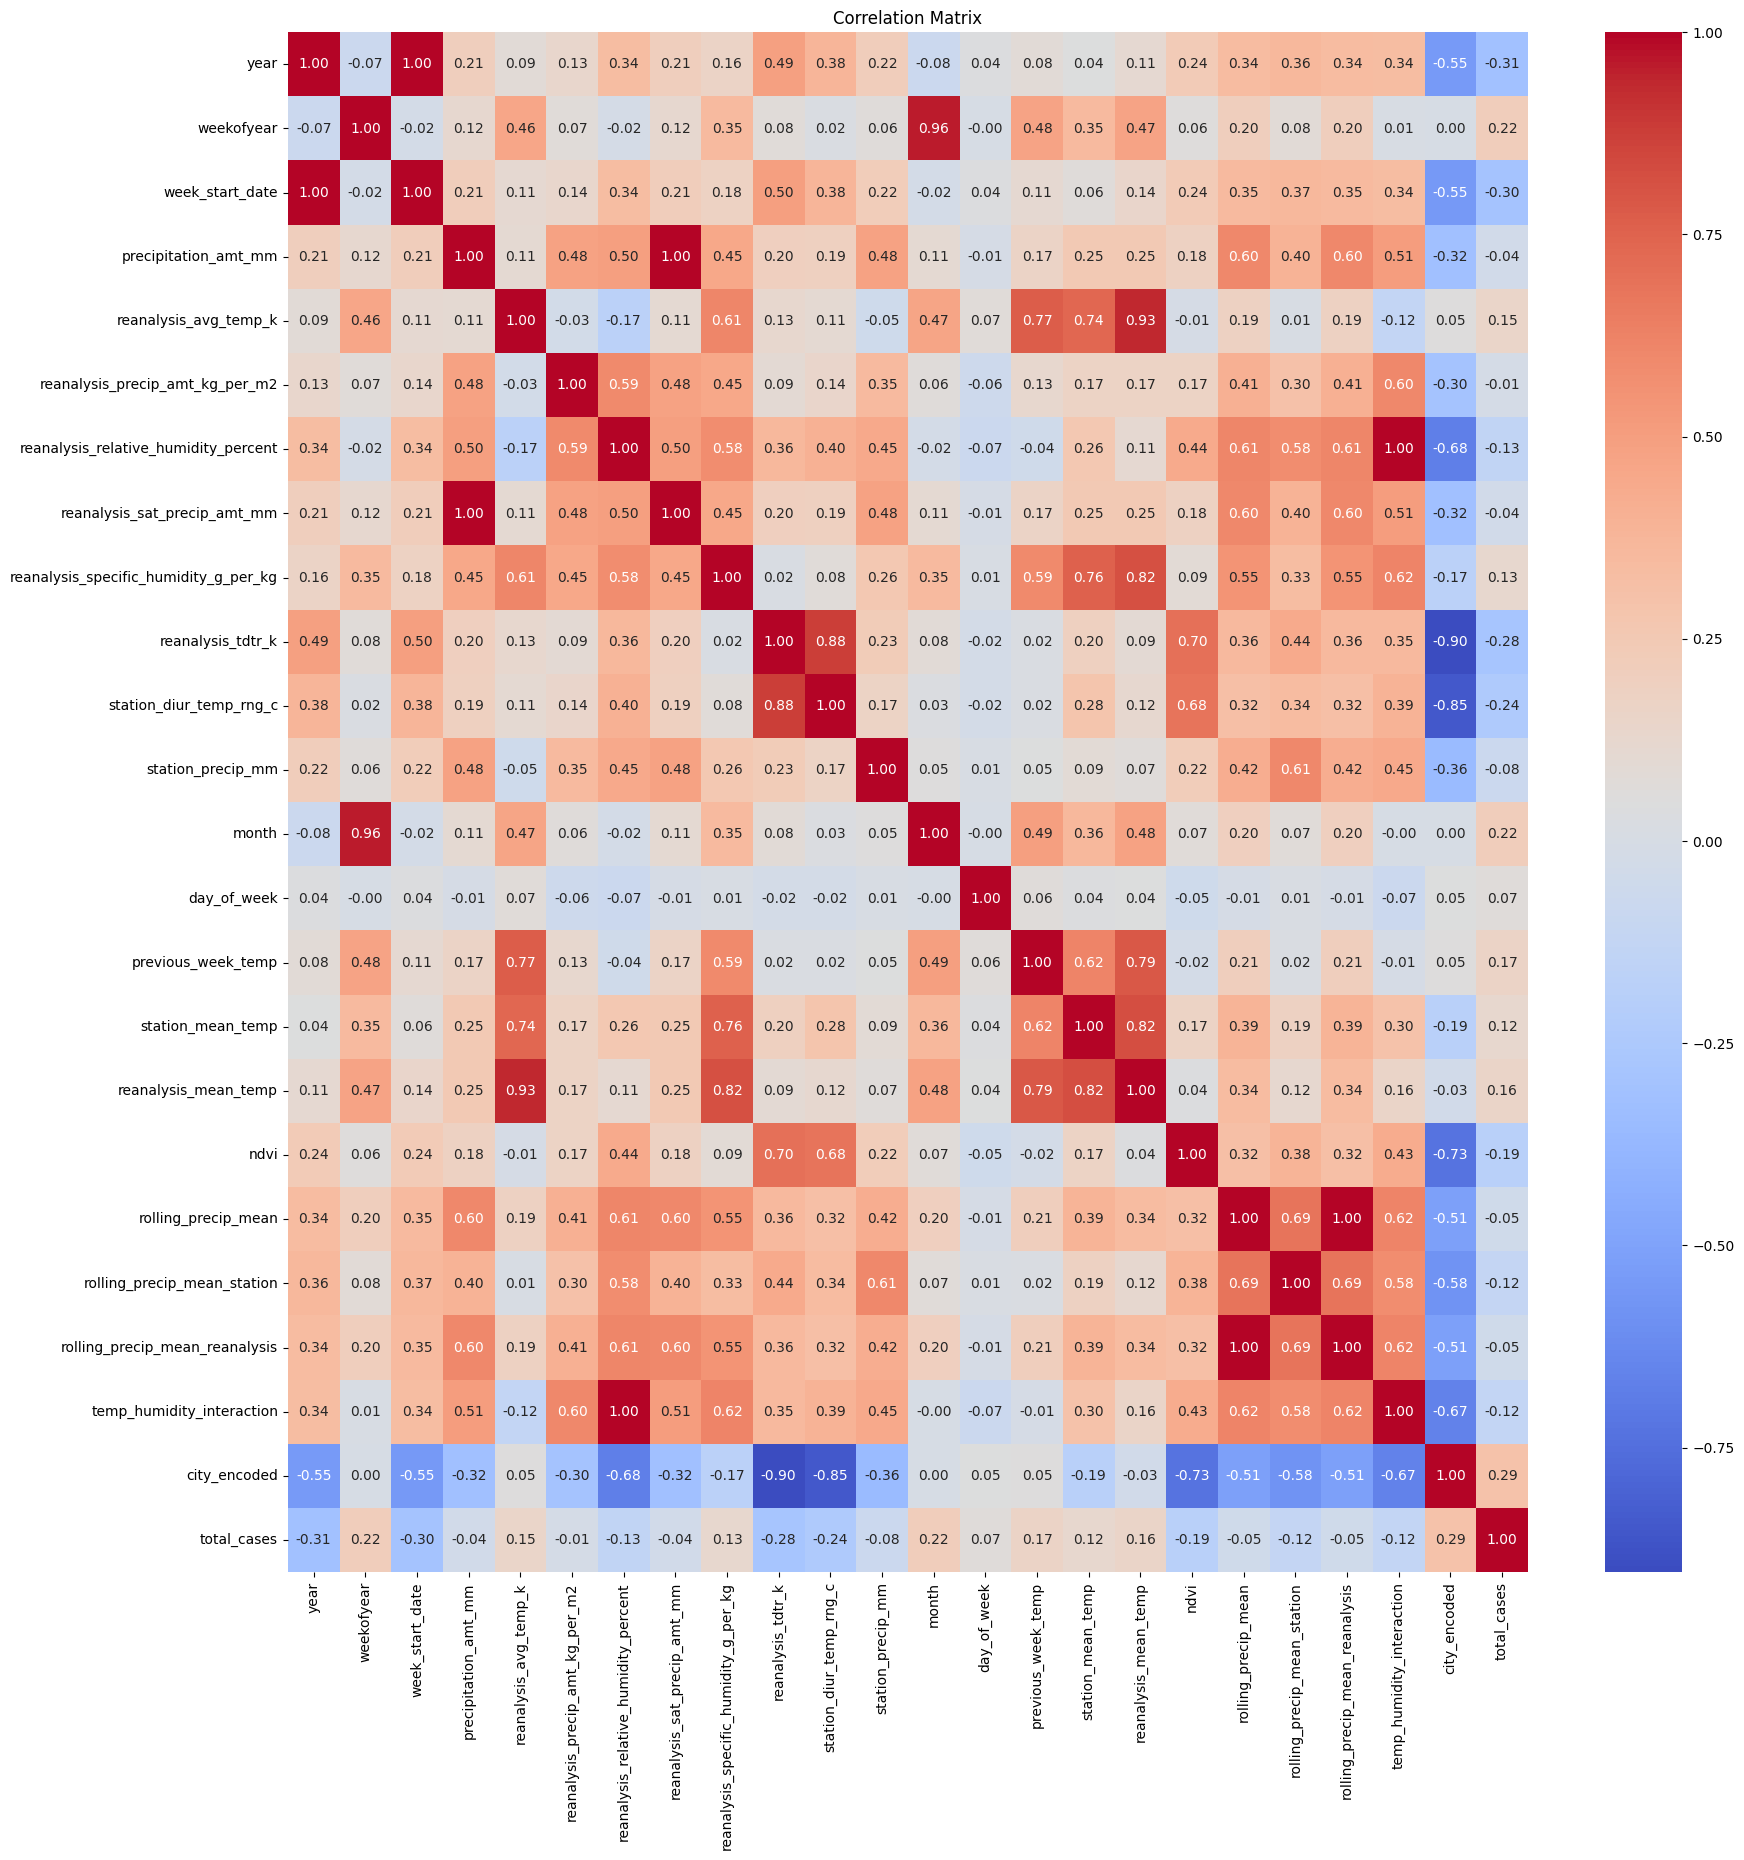

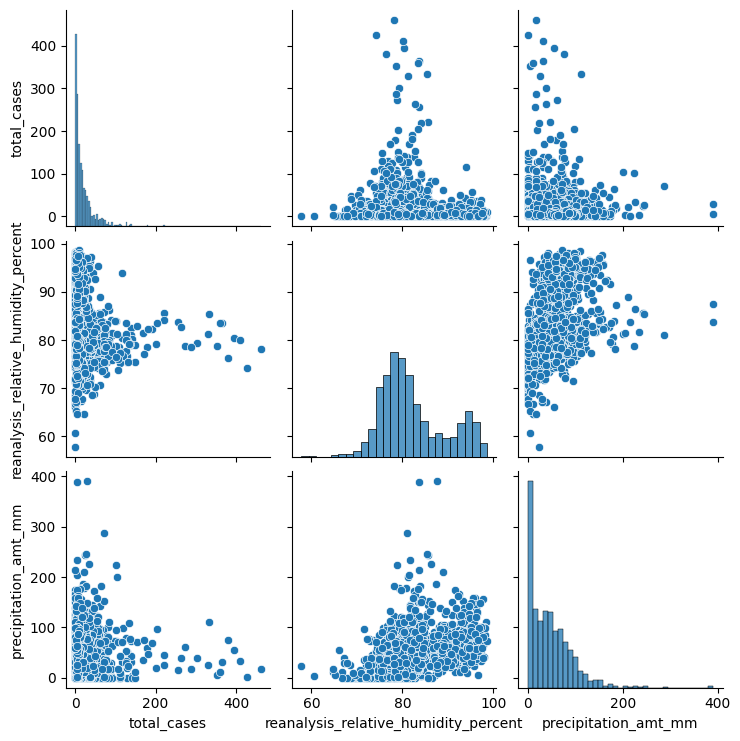

<Axes: xlabel='city', ylabel='total_cases'>

Text(0.5, 1.0, 'Distribution of Dengue Cases by City')

Text(0.5, 0, 'City')

Text(0, 0.5, 'Total Cases')

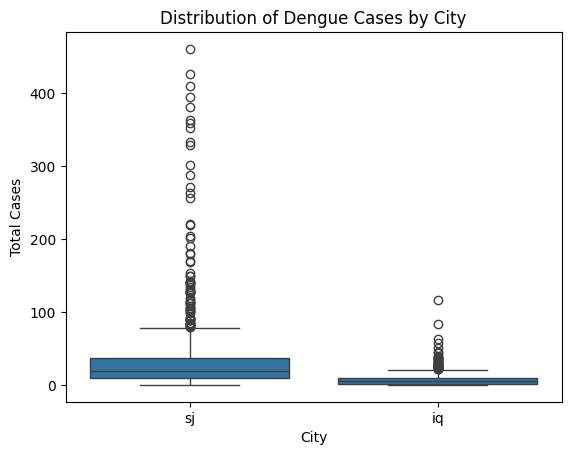

In [54]:
# Histograms
sns.histplot(data=dengue_feature_train_data, x='total_cases', bins=50, kde=True)
plt.title('Distribution of Dengue Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.show()

# Time Series Plot
sns.lineplot(data=dengue_feature_train_data, x='week_start_date', y='total_cases', hue='city')
plt.title('Time Series of Dengue Cases')
plt.xlabel('Week Start Date')
plt.ylabel('Total Cases')
plt.show()

# Correlation Matrix
plt.figure(figsize=(20,20))
Corr_data = dengue_feature_train_data.drop(columns=['city'])
correlation_matrix = Corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(dengue_feature_train_data[['total_cases', 'reanalysis_relative_humidity_percent', 'precipitation_amt_mm']])
plt.show()

# Boxplot
sns.boxplot(data=dengue_feature_train_data, x='city', y='total_cases')
plt.title('Distribution of Dengue Cases by City')
plt.xlabel('City')
plt.ylabel('Total Cases')
plt.show()


In [55]:
Corr_data = dengue_feature_train_data.drop(columns=['city'])
correlation_matrix = Corr_data.corr()
# Select upper triangle of correlation matrix
corr_upper_train = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop_train = [column for column in corr_upper_train.columns if any(corr_upper_train[column] > 0.95) or any(corr_upper_train[column] < -0.95)]
to_drop_train

['week_start_date',
 'reanalysis_sat_precip_amt_mm',
 'month',
 'rolling_precip_mean_reanalysis',
 'temp_humidity_interaction']

In [56]:
dengue_feature_train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'precipitation_amt_mm',
       'reanalysis_avg_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_precip_mm', 'month', 'day_of_week',
       'previous_week_temp', 'station_mean_temp', 'reanalysis_mean_temp',
       'ndvi', 'rolling_precip_mean', 'rolling_precip_mean_station',
       'rolling_precip_mean_reanalysis', 'temp_humidity_interaction',
       'city_encoded', 'total_cases'],
      dtype='object')

In [57]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Define numerical features
numerical_features = ['weekofyear',
                      'ndvi',
                      'precipitation_amt_mm', 
                      'reanalysis_mean_temp',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_specific_humidity_g_per_kg',  
                      'reanalysis_tdtr_k', 
                      'station_diur_temp_rng_c', 
                      'station_precip_mm', 
                      'day_of_week',
                      'previous_week_temp', 
                      'station_mean_temp', 
                      'rolling_precip_mean',
                      'rolling_precip_mean_station']

# Fit scaler on training data and transform both training and testing data
# dengue_feature_train_data[numerical_features] = scaler.fit_transform(dengue_feature_train_data[numerical_features])
# dengue_feature_test_data[numerical_features] = scaler.transform(dengue_feature_test_data[numerical_features])


In [58]:
dengue_feature_train_data.head()

,city,year,weekofyear,week_start_date,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,...,previous_week_temp,station_mean_temp,reanalysis_mean_temp,ndvi,rolling_precip_mean,rolling_precip_mean_station,rolling_precip_mean_reanalysis,temp_humidity_interaction,city_encoded,total_cases
0,sj,1990,22,1990-05-28,7.52,299.664286,12.20,80.460000,7.52,17.210000,...,299.228571,302.430952,298.685000,0.239235,18.532,15.16,18.532,24099.264257,1,6
1,sj,1990,23,1990-06-04,9.58,299.764286,26.49,79.891429,9.58,17.212857,...,299.664286,301.954762,298.995357,0.191364,17.964,19.78,17.964,23937.868743,1,2
2,sj,1990,24,1990-06-11,3.48,299.221429,38.60,82.000000,3.48,17.234286,...,299.764286,300.788095,298.518214,0.155261,14.096,24.00,14.096,24534.985714,1,4
3,sj,1990,25,1990-06-18,151.12,299.528571,30.00,83.375714,151.12,17.977143,...,299.221429,301.507143,298.780714,0.107375,37.412,19.94,37.412,24978.649351,1,5
4,sj,1990,26,1990-06-25,19.32,299.557143,37.51,82.768571,19.32,17.790000,...,299.528571,301.492857,298.939286,0.124449,38.204,23.36,38.204,24795.690388,1,10


In [59]:
# Separate data for each city  sj for San Juan and iq for Iquitos

San_Juan_data = dengue_feature_train_data[dengue_feature_train_data['city'] == 'sj']
Iquitos_data = dengue_feature_train_data[dengue_feature_train_data['city'] == 'iq']

San_Juan_test = dengue_feature_test_data[dengue_feature_test_data['city'] == 'sj']
Iquitos_test = dengue_feature_test_data[dengue_feature_test_data['city'] == 'iq']

In [60]:
San_Juan_data = San_Juan_data[[ 'weekofyear',
                      'ndvi',
                      'precipitation_amt_mm', 
                      'reanalysis_mean_temp',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_specific_humidity_g_per_kg',  
                      'reanalysis_tdtr_k', 
                      'station_diur_temp_rng_c', 
                      'station_precip_mm', 
                      'day_of_week',
                      'previous_week_temp', 
                      'station_mean_temp', 
                      'rolling_precip_mean',
                      'rolling_precip_mean_station','total_cases']]

In [61]:
San_Juan_data.shape

(932, 16)

In [62]:
Iquitos_data.shape

(520, 25)

In [63]:
dengue_feature_train_data.columns.value_counts().sum()

25

In [64]:
from sklearn.model_selection import train_test_split

# Split data into features and target variable
San_Juan_X = San_Juan_data[[
                      'weekofyear',
                      'ndvi',
                      'precipitation_amt_mm', 
                      'reanalysis_mean_temp',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_specific_humidity_g_per_kg',  
                      'reanalysis_tdtr_k', 
                      'station_diur_temp_rng_c', 
                      'station_precip_mm', 
                      'day_of_week',
                      'previous_week_temp', 
                      'station_mean_temp', 
                      'rolling_precip_mean',
                      'rolling_precip_mean_station']]
San_Juan_y = San_Juan_data['total_cases']

Iquitos_X = Iquitos_data[[ 
                      'weekofyear',
                      'ndvi',
                      'precipitation_amt_mm', 
                      'reanalysis_mean_temp',
                      'reanalysis_precip_amt_kg_per_m2',
                      'reanalysis_relative_humidity_percent',
                      'reanalysis_specific_humidity_g_per_kg',  
                      'reanalysis_tdtr_k', 
                      'station_diur_temp_rng_c', 
                      'station_precip_mm', 
                      'day_of_week',
                      'previous_week_temp', 
                      'station_mean_temp', 
                      'rolling_precip_mean',
                      'rolling_precip_mean_station']]
Iquitos_y = Iquitos_data['total_cases']

# Split data into training and testing sets
San_Juan_X_train, San_Juan_X_test, San_Juan_y_train, San_Juan_y_test = train_test_split(San_Juan_X, San_Juan_y, test_size=0.2, random_state=49)
Iquitos_X_train, Iquitos_X_test, Iquitos_X_train, Iquitos_y_test = train_test_split(Iquitos_X, Iquitos_y, test_size=0.2, random_state=49)

In [65]:
print(San_Juan_X_train.shape)
print(San_Juan_X_test.shape)
print(San_Juan_y_train.shape)
print(San_Juan_y_test.shape)

(745, 15)
(187, 15)
(745,)
(187,)


In [72]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Create SVR model
svm_model = SVR(kernel='poly', C=100, gamma='auto')  # You may need to adjust hyperparameters

# Train the model
svm_model.fit(San_Juan_X_train, San_Juan_y_train)

# Make predictions on the validation set
y_pred = svm_model.predict(San_Juan_X_test)

# Evaluate the model
mae = mean_absolute_error(San_Juan_y_test, y_pred)
print("Mean Absolute Error on Validation Set:", mae)


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(San_Juan_y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(San_Juan_y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate SMAPE
def calculate_smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Assuming y_val is true values and y_pred is predicted values
mape = calculate_mape(San_Juan_y_test, y_pred)
smape = calculate_smape(San_Juan_y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Symmetric Mean Absolute Percentage Error (SMAPE):", smape)

Mean Absolute Error (MAE): 26.44639285844813
Mean Squared Error (MSE): 1972.1450195491561
Root Mean Squared Error (RMSE): 44.40883943033364
Mean Absolute Percentage Error (MAPE): 232.6989500033429
Symmetric Mean Absolute Percentage Error (SMAPE): 78.38405953473944


In [103]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Assume 'X' is your feature matrix and 'y' is your target variable
# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(San_Juan_X, San_Juan_y, test_size=0.2, random_state=42)

# # Scalar
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize MLPClassifier
# mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# # Train the classifier
# mlp_classifier.fit(X_train, y_train)

# # Predict on the test set
# y_pred = mlp_classifier.predict(X_test)

# # Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

Accuracy: 0.016042780748663103


In [26]:
# from pmdarima.arima import auto_arima

# target_variable = Iquitos_data['total_cases']
# exogenous_variables = Iquitos_data[numerical_features]  # List of exogenous variables

# # Use auto_arima to find the optimal ARIMA parameters
# arima_model = auto_arima(target_variable, exogenous=exogenous_variables, start_p=1, start_q=1, max_p=2, max_q=2,
#                          seasonal=True, m=52, D=1, max_P=2, max_D=1, max_Q=2,
#                          max_order=None, trace=True,
#                          error_action='ignore',  # don't want to know if an order does not work
#                          suppress_warnings=True,  # don't want convergence warnings
#                          stepwise=True, random_state=42, n_fits=20)

# # Print the summary of the model
# print(arima_model.summary())


In [114]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Assume 'df' is your DataFrame with 'total_cases' and other relevant features
# # Assume 'numerical_features' contains exogenous variables/features

# # Split data into train and test sets
# train_data_sj, test_data_sj = train_test_split(San_Juan_data, test_size=0.2, shuffle=False)

# print(train_data_sj.shape)
# print(test_data_sj.shape)

# X_train_scaled = scaler.fit_transform(train_data_sj)
# X_test_scaled = scaler.transform(test_data_sj)

# # Define SARIMAX model parameters
# p = 1  # Autoregressive order
# d = 1  # Integration order
# q = 1  # Moving average order
# P = 1  # Seasonal autoregressive order
# D = 1  # Seasonal integration order
# Q = 1  # Seasonal moving average order
# m = 52  # Seasonal period (assuming weekly data)

# # Fit SARIMAX model
# sarimax_model = SARIMAX(train_data_sj['total_cases'], exog=train_data_sj[numerical_features], order=(p, d, q), seasonal_order=(P, D, Q, m))
# sarimax_result = sarimax_model.fit()

# # Make predictions
# sarimax_forecast_sj = sarimax_result.predict(start=test_data_sj.index[0], end=test_data_sj.index[-1], exog=test_data_sj[numerical_features])



(745, 16)
(187, 16)


c:\Users\nilak\.conda\envs\dsp_ucsc\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [115]:
# sarimax_forecast_sj

745    14.281426
746    31.802115
747    33.420862
748    36.252520
749    31.468521
         ...    
927   -43.300730
928   -44.777168
929   -46.978881
930   -44.815776
931   -42.229262
Name: predicted_mean, Length: 187, dtype: float64

In [116]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Mean Absolute Error (MAE)
# mae = mean_absolute_error(test_data_sj['total_cases'], sarimax_forecast_sj)

# # Mean Squared Error (MSE)
# mse = mean_squared_error(test_data_sj['total_cases'], sarimax_forecast_sj)

# # Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mse)

# # Replace zero values with a small value (e.g., 1) in the denominator
# test_data_no_zeros = test_data_sj['total_cases'].replace(0, 1)

# # Compute MAPE using the modified test data
# mape = np.mean(np.abs((test_data_no_zeros - sarimax_forecast_sj) / test_data_no_zeros)) * 100

# # Symmetric Mean Absolute Percentage Error (SMAPE)
# smape = (np.mean(np.abs(test_data_sj['total_cases'] - sarimax_forecast_sj)) / 
#          np.mean((np.abs(test_data_sj['total_cases']) + np.abs(sarimax_forecast_sj)) / 2)) * 100

# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)
# print("Mean Absolute Percentage Error (MAPE):", mape)
# print("Symmetric Mean Absolute Percentage Error (SMAPE):", smape)


Mean Absolute Error (MAE): 36.6627318779331
Mean Squared Error (MSE): 2019.7240327515055
Root Mean Squared Error (RMSE): 44.94133990827939
Mean Absolute Percentage Error (MAPE): 455.5140637592332
Symmetric Mean Absolute Percentage Error (SMAPE): 157.56831083195112


In [117]:
# sarimax_predictions = sarimax_result.predict(start=San_Juan_test.index[0], end=San_Juan_test.index[-1], exog=San_Juan_test[numerical_features])

In [118]:
# sarimax_predictions

4       7.425079
5      11.548037
6       6.950841
7       7.686524
8       1.218607
         ...    
255    -1.314378
256     0.357659
257    11.093514
258     4.946497
259     6.060322
Name: predicted_mean, Length: 256, dtype: float64

In [ ]:
# # Make predictions# Adjust start and end indices for prediction
# start_idx = test_data.index[0]
# end_idx = test_data.index[-1]

# # Make predictions
# sarimax_forecast = sarimax_result.predict(start=start_idx, end=end_idx, exog=test_data[exog_var])


# # Evaluate model performance
# mse = mean_squared_error(test_data['total_cases'], sarimax_forecast)
# rmse = np.sqrt(mse)
# print("Root Mean Squared Error (RMSE):", rmse)

In [124]:
# from sklearn.ensemble import RandomForestRegressor

# # Initialize Random Forest regressor
# rf_model = RandomForestRegressor(n_estimators=100,criterion='poisson', random_state=49)
# San_Juan_X_train, San_Juan_X_test, San_Juan_y_train, San_Juan_y_test = train_test_split(San_Juan_X, San_Juan_y, test_size=0.2, random_state=49)
# X_train_scaled = scaler.fit_transform(San_Juan_X_train)
# X_test_scaled = scaler.transform(San_Juan_X_test)

# # Fit the model
# rf_model.fit(X_train_scaled, San_Juan_y_train)

# # Make predictions
# rf_predictions = rf_model.predict(X_test_scaled)


RandomForestRegressor(criterion='poisson', random_state=49)

In [125]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# mae = mean_absolute_error(San_Juan_y_test, rf_predictions)
# mse = mean_squared_error(San_Juan_y_test, rf_predictions)
# rmse = np.sqrt(mse)

# print("Mean Absolute Error:", mae)
# print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 21.085097448896914
Root Mean Squared Error: 34.575094432159126


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

Text(0.5, 1.0, 'Actual vs. Predicted Values')

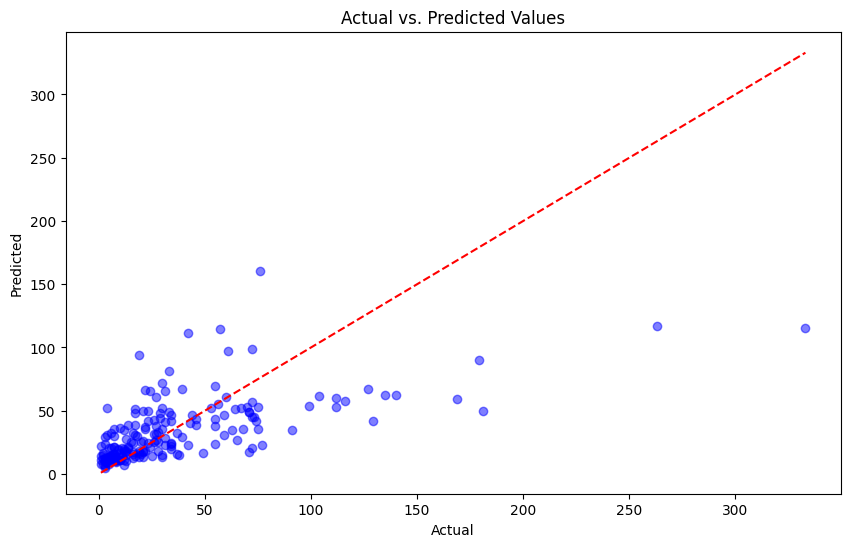

In [126]:
# plt.figure(figsize=(10, 6))
# plt.scatter(San_Juan_y_test, rf_predictions, color='blue', alpha=0.5)
# plt.plot([San_Juan_y_test.min(), San_Juan_y_test.max()], [San_Juan_y_test.min(), San_Juan_y_test.max()], linestyle='--', color='red')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs. Predicted Values')
# plt.show()


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 15 artists>

([<matplotlib.axis.XTick at 0x1cb15226dd0>,
 [Text(0, 0, 'weekofyear'),
  Text(1, 0, 'reanalysis_specific_humidity_g_per_kg'),
  Text(2, 0, 'day_of_week'),
  Text(3, 0, 'station_mean_temp'),
  Text(4, 0, 'rolling_precip_mean'),
  Text(5, 0, 'ndvi'),
  Text(6, 0, 'reanalysis_mean_temp'),
  Text(7, 0, 'previous_week_temp'),
  Text(8, 0, 'station_diur_temp_rng_c'),
  Text(9, 0, 'rolling_precip_mean_station'),
  Text(10, 0, 'reanalysis_relative_humidity_percent'),
  Text(11, 0, 'station_precip_mm'),
  Text(12, 0, 'reanalysis_precip_amt_kg_per_m2'),
  Text(13, 0, 'reanalysis_tdtr_k'),
  Text(14, 0, 'precipitation_amt_mm')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

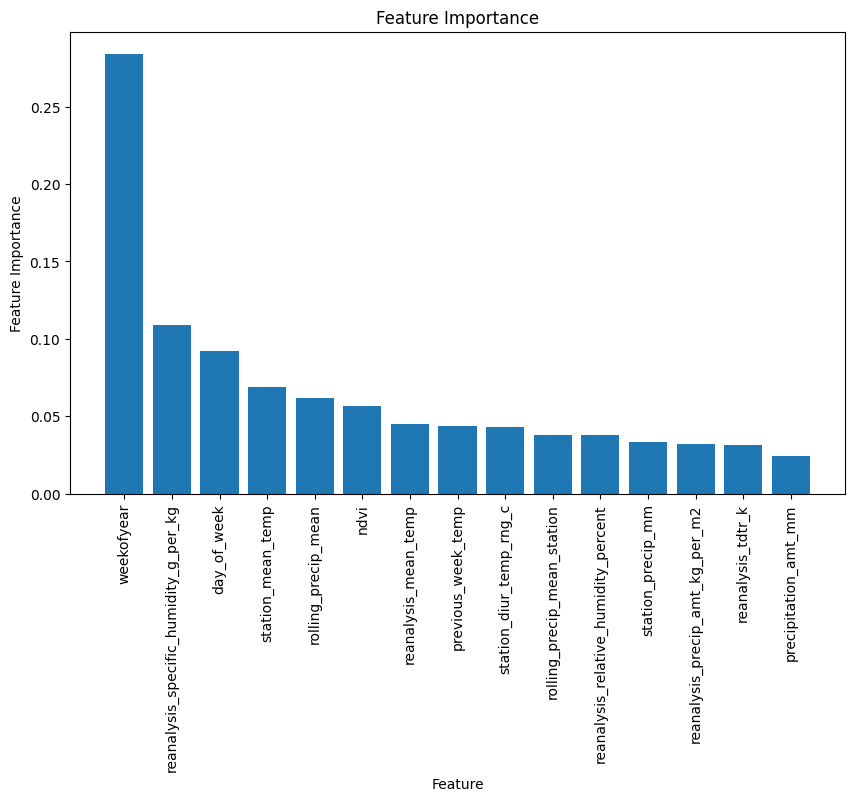

In [127]:
# # Get feature names
# feature_names = San_Juan_X_train.columns

# # Get feature importances
# feature_importance = rf_model.feature_importances_

# # Sort feature importances and corresponding feature names
# sorted_idx = np.argsort(feature_importance)[::-1]
# sorted_feature_names = feature_names[sorted_idx]

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.bar(range(San_Juan_X_train.shape[1]), feature_importance[sorted_idx], align='center')
# plt.xticks(range(San_Juan_X_train.shape[1]), sorted_feature_names, rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('Feature Importance')
# plt.title('Feature Importance')
# plt.show()


In [46]:
# from sklearn.ensemble import GradientBoostingRegressor

# # Initialize Gradient Boosting regressor
# gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=49,criterion='friedman_mse',max_depth=10,max_leaf_nodes=10)

# # Fit the model
# gbm_model.fit(San_Juan_X_train, San_Juan_y_train)

# # Make predictions
# gbm_predictions = gbm_model.predict(San_Juan_X_test)


GradientBoostingRegressor(learning_rate=0.01, max_depth=10, max_leaf_nodes=10,
                          random_state=49)

In [47]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(San_Juan_y_test, gbm_predictions)

# # Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(San_Juan_y_test, gbm_predictions)

# # Calculate R-squared (R2) score
# r2 = r2_score(San_Juan_y_test, gbm_predictions)

# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 24.108963915663168
Mean Squared Error (MSE): 1361.0664332199833
R-squared (R2) Score: 0.2996070613999934


In [48]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# # Reshape data for LSTM input
# X_train_lstm = np.array(San_Juan_X_train).reshape(San_Juan_X_train.shape[0], San_Juan_X_train.shape[1], 1)
# X_test_lstm = np.array(San_Juan_X_test).reshape(San_Juan_X_test.shape[0], San_Juan_X_test.shape[1], 1)

# # # Reshape data for LSTM input
# # X_train_lstm = San_Juan_X_train.reshape(San_Juan_X_train.shape[0], San_Juan_X_train.shape[1], 1)
# # X_test_lstm = San_Juan_X_test.reshape(San_Juan_X_test.shape[0], San_Juan_X_test.shape[1], 1)

# # Initialize LSTM model
# lstm_model = Sequential()
# lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], 1)))
# lstm_model.add(Dense(units=1))

# # Compile the model
# lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# # Fit the model
# lstm_model.fit(X_train_lstm, San_Juan_y_train, epochs=100, batch_size=32)

# # Make predictions
# lstm_predictions = lstm_model.predict(X_test_lstm)


c:\Users\nilak\.conda\envs\dsp_ucsc\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4704.3066
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4284.9023
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4096.6294
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2899.5671
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3049.2090
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3370.4604
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3070.2031
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2095.8762
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2863.3713
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2876.2080
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3337.8030
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3097.0906
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3246.0117
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3137.6907
Epoch 15/100
24/24 ━━━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [49]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Make predictions
# lstm_predictions = lstm_model.predict(X_test_lstm)

# # Evaluate the model
# mse = mean_squared_error(San_Juan_y_test, lstm_predictions)
# mae = mean_absolute_error(San_Juan_y_test, lstm_predictions)

# print("Mean Squared Error (MSE):", mse)
# print("Mean Absolute Error (MAE):", mae)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 1583.426647272334
Mean Absolute Error (MAE): 23.849274742412057
